In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


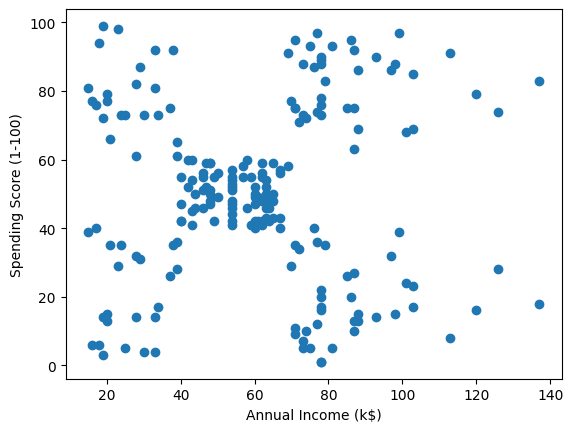

In [13]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
df.rename(columns={'Annual Income (k$)':'income'},inplace=True)
df.rename(columns={'Spending Score (1-100)':'score'},inplace=True)


In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])
scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])
df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [16]:
k_range=range(1,11)
list_dist=[]
for i in k_range:
    kmeans_model=KMeans(n_clusters=i)
    kmeans_model.fit(df[['income','score']])
    list_dist.append(kmeans_model.inertia_)

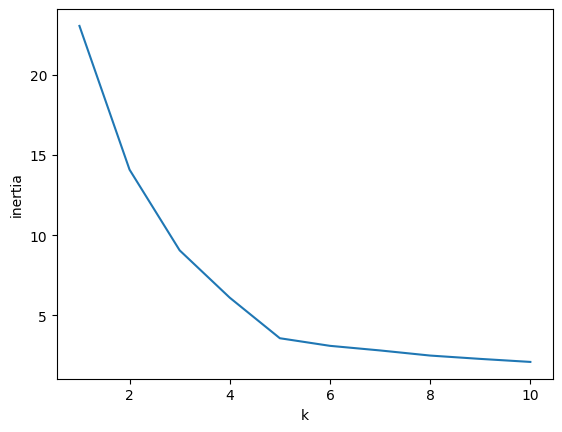

In [17]:
plt.xlabel('k')
plt.ylabel('inertia')
plt.plot(k_range,list_dist)
plt.show()

In [18]:
#EN İYİ DEĞER DİRSEK OLAN K=5 İÇİN YAPILACAK 
kmeans_model=KMeans(n_clusters=5)
y_predicted=kmeans_model.fit_predict(df[['income','score']])
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [19]:
df['cluster']=y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,3
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,3
4,5,0.016393,0.397959,4


In [20]:
kmeans_model.cluster_centers_

array([[0.59631148, 0.16921769],
       [0.58638083, 0.82783883],
       [0.32695811, 0.49533888],
       [0.08792846, 0.79962894],
       [0.08792846, 0.19619666]])

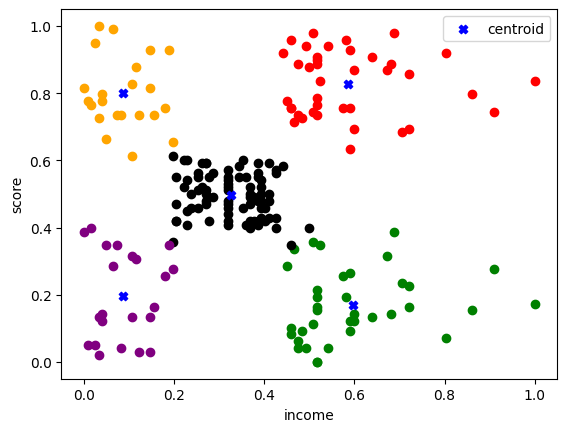

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'],df1['score'],color='green')
plt.scatter(df2['income'],df2['score'],color='red')
plt.scatter(df3['income'],df3['score'],color='black')
plt.scatter(df4['income'],df4['score'],color='orange')
plt.scatter(df5['income'],df5['score'],color='purple')



#.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını.cluster_centers_[:,0] 
# ve.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend()
plt.show()

